In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)

In [2]:
# getting data 

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
x_train[0].shape

(32, 32, 3)

In [4]:
x_tr, x_te = x_train/255, x_test/255


In [5]:
x_tr.shape

(50000, 32, 32, 3)

In [6]:
K = len(set(y_train.flatten()))

In [7]:
# check the shape of the n/w at each step
i = tf.keras.layers.Input(x_train[0].shape)

# shape of the input layer 
print(i.shape)

x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=2, padding='same', activation='relu')(i)

# shape of the first layer
print(x.shape)

x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=2, padding = 'same', activation='relu')(x)

# shape of the second layer
print(x.shape)

x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=2, padding='same', activation='relu')(x)

# shape of the third layer
print(x.shape)

# flatten the data
x = tf.keras.layers.Flatten() (x)

# shape of the final flattened layer
print(x.shape)

# drop out some of the nodes 
x = tf.keras.layers.Dropout(0.2) (x)

# Adding first Dense layer
x = tf.keras.layers.Dense(256, activation='relu', )(x)

# shape of the first dense layer
print(x.shape)

# dropout some of the nodes (2nd dropout layer)
x = tf.keras.layers.Dropout(0.2) (x)

x = tf.keras.layers.Dense(512, activation='relu') (x)

# shape of the second dense layer
print(x.shape)

# final Dense layer addition
x = tf.keras.layers.Dense(K, activation='softmax') (x)

# shape of the final Dense layer
print(x.shape)


# create a model
model = tf.keras.Model(i,x)


model.compile(metrics=['accuracy'], loss='sparse_categorical_crossentropy', optimizer='adam')



(None, 32, 32, 3)
(None, 16, 16, 32)
(None, 8, 8, 64)
(None, 4, 4, 128)
(None, 2048)
(None, 256)
(None, 512)
(None, 10)


In [4]:
help(tf.keras.layers.Dropout)

Help on class Dropout in module tensorflow.python.keras.layers.core:

class Dropout(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dropout(*args, **kwargs)
 |  
 |  Applies Dropout to the input.
 |  
 |  The Dropout layer randomly sets input units to 0 with a frequency of `rate`
 |  at each step during training time, which helps prevent overfitting.
 |  Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over
 |  all inputs is unchanged.
 |  
 |  Note that the Dropout layer only applies when `training` is set to True
 |  such that no values are dropped during inference. When using `model.fit`,
 |  `training` will be appropriately set to True automatically, and in other
 |  contexts, you can set the kwarg explicitly to True when calling the layer.
 |  
 |  (This is in contrast to setting `trainable=False` for a Dropout layer.
 |  `trainable` does not affect the layer's behavior, as Dropout does
 |  not have any variables/weights that can be frozen during training.)

In [8]:
# fitting the model 

hist = model.fit(x_tr,y_train, validation_data=(x_te,y_test), epochs=20)

Epoch 1/20
1563/1563 [==============================] - 19s 11ms/step - loss: 1.7689 - accuracy: 0.3458 - val_loss: 1.2647 - val_accuracy: 0.5502
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2842 - accuracy: 0.5376 - val_loss: 1.1123 - val_accuracy: 0.6055
Epoch 3/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1054 - accuracy: 0.6024 - val_loss: 1.0638 - val_accuracy: 0.6245
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9732 - accuracy: 0.6487 - val_loss: 1.0067 - val_accuracy: 0.6411
Epoch 5/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8856 - accuracy: 0.6853 - val_loss: 0.9837 - val_accuracy: 0.6487
Epoch 6/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8114 - accuracy: 0.7100 - val_loss: 0.9472 - val_accuracy: 0.6641
Epoch 7/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7348 - accuracy: 0.7372 - val_loss: 0.9640 -

In [11]:
# lets plot the loss and accuracy
train_loss, train_accuracy, val_loss, val_accuracy = \
hist.history['loss'], hist.history['accuracy'], hist.history['val_loss'], hist.history['val_accuracy']

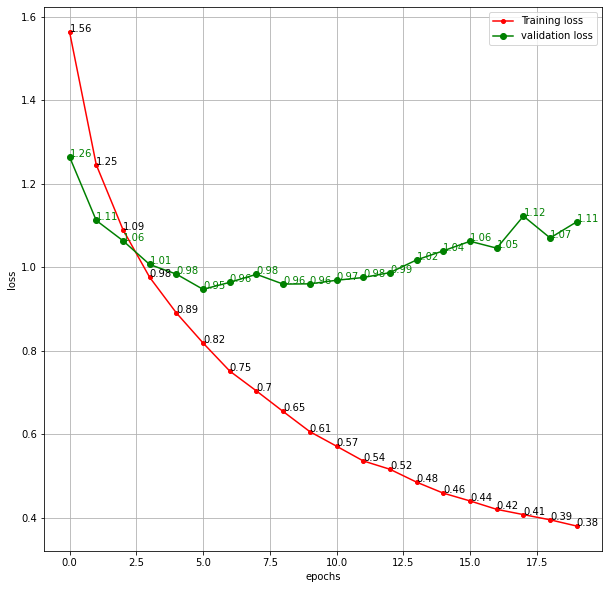

In [54]:
x_points = list(range(len(train_loss)))
plt.plot(x_points,train_loss, c='r',label='Training loss',marker='o', markersize=4)
for ind,point in enumerate(train_loss):
    plt.text(ind,point,round(point,2))
plt.plot(x_points,val_loss, c='g', label='validation loss', marker='o')
for ind,point in enumerate(val_loss):
    plt.text(ind,point,round(point,2),color='g')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid()

plt.show()

In [35]:
# plotting accuracy 

False